# DH1

heartcored98님의 명강의를 보면서 공부한 노트
https://github.com/heartcored98/Standalone-DeepLearning 
<BR>
이해 안 가는 부분만 기록하자,
이해 안 간다의 기준은? -> 내가 직접 설명해보고 막히는 부분

### 오리엔테이션 스킵 

특징 학습(feature learning) 또는 표현 학습(representation learning)은 특징을 자동으로 추출할 수 있도록 학습하는 과정이다. 지도 학습과 비지도 학습으로 나눌 수 있다. (강사님이 깊게 안 다루는 부분은 그냥 넘어가자, 여기에 너무 매몰되면 시간 날아가는거 한순간이다.)

##### (lec2 기본적인 머신러닝 소개)


Regression analysis: Analyzing the relationship between variables, typically predicting a continuous outcome based on one or more predictor variables. <br>

    
Classification: Categorizing data into predefined classes or categories based on its features or attributes. <br>

    
Clustering: Grouping data points into clusters or segments based on similarity or proximity in their features or attributes. <br>

Dimensionality reduction refers to the process of reducing the number of input variables or features under consideration, typically to simplify the model, improve computational efficiency, or to visualize data. It helps in summarizing the essential information in the dataset while retaining its key characteristics. <br>

##### lect3 정말 간단한 일변량 회귀분석 + 경사하강법 + 다변량회귀분석





####  letc 4 회귀분석 실습
https://github.com/heartcored98/Standalone-DeepLearning/blob/master/Lec1/Lab1_linear_regression.ipynb
여기 있는 코드를 참조하면서 공부중

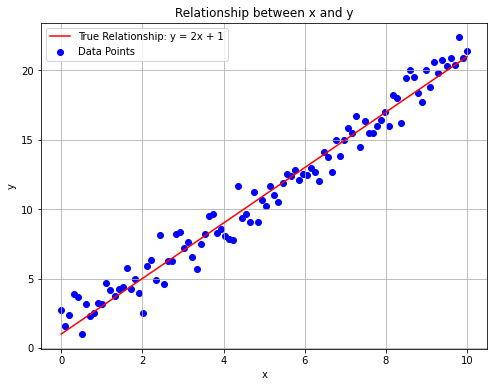

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class DataVisualizer:
    def __init__(self, num_points=100, noise_mean=0, noise_std=1):
        self.num_points = num_points
        self.noise_mean = noise_mean
        self.noise_std = noise_std
    
    def generate_data(self):
        np.random.seed(0)
        self.x = np.linspace(0, 10, self.num_points)
        self.y_true = 2 * self.x + 1
        self.y = self.y_true + np.random.normal(self.noise_mean, self.noise_std, size=self.num_points)
    
    def plot_data(self):
        plt.figure(figsize=(8, 6))
        
        plt.scatter(self.x, self.y, color='b', label='Data Points')
        plt.plot(self.x, self.y_true, linestyle='-', color='r', label='True Relationship: y = 2x + 1')
        
        plt.title('Relationship between x and y')
        plt.xlabel('x')
        plt.ylabel('y')
        
        plt.grid(True)
        plt.legend()
        
        plt.show()

# 예시로 클래스 사용하기
if __name__ == "__main__":
    visualizer = DataVisualizer(num_points=100, noise_mean=0, noise_std=1)
    visualizer.generate_data()
    visualizer.plot_data()


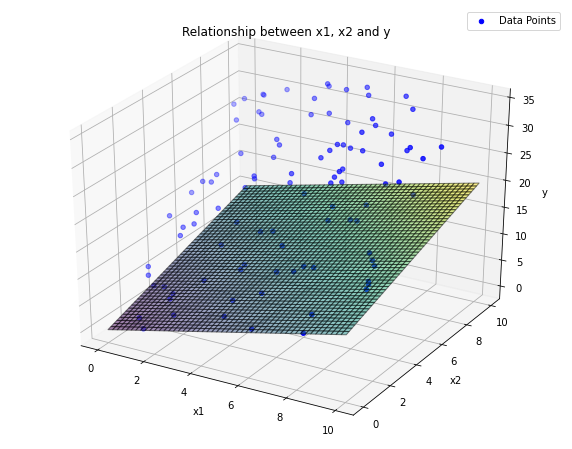

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class DataVisualizer:
    def __init__(self, num_points=100, noise_mean=0, noise_std=1):
        self.num_points = num_points
        self.noise_mean = noise_mean
        self.noise_std = noise_std
    
    def generate_data(self):
        np.random.seed(0)
        self.x1 = np.random.uniform(0, 10, size=self.num_points)
        self.x2 = np.random.uniform(0, 10, size=self.num_points)
        self.y_true = self.x1 + 3*self.x2
        self.y = self.y_true + np.random.normal(self.noise_mean, self.noise_std, size=self.num_points)
    
    def plot_data(self):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d') # 3차 원 그릴 때 사용
        #111은 1행 1열 첫번째 (subplot의 전체의 행 / 전체의 열/  인덱스) ,
        
        ax.scatter(self.x1, self.x2, self.y, color='b', label='Data Points')
        
        # Plotting the true function surface
        x1_mesh, x2_mesh = np.meshgrid(np.linspace(0, 10, 50), np.linspace(0, 10, 50))# 각 차원의 모든조합
        y_true_mesh = x1_mesh + x2_mesh
        ax.plot_surface(x1_mesh, x2_mesh, y_true_mesh, alpha=0.5, cmap='viridis', edgecolor='k')
        
        ax.set_title('Relationship between x1, x2 and y')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')
        
        ax.legend()
        
        plt.show()

# 예시로 클래스 사용하기
if __name__ == "__main__":
    visualizer = DataVisualizer(num_points=100, noise_mean=0, noise_std=1)
    visualizer.generate_data()
    visualizer.plot_data()


In [3]:
import numpy as np

class MultivariateH:
    def __init__(self, w):
        # w는 다변량 파라미터 벡터입니다.
        self.w = np.array(w)
    
    def forward(self, X):
        # X는 다변량 입력 행렬입니다. 각 행은 하나의 샘플을 나타내며, 열은 다른 특성을 나타냅니다.
        return np.dot(X, self.w)
    
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error /= len(X)
    return error

def better_cost(pred_Y, true_Y):
    error = 0
    for i in range(len(pred_Y)):
        error += (pred_Y[i] - true_Y[i])**2
    error /= len(pred_Y)
    return error

# 예시 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 3)  # 100개의 샘플과 각각 3개의 특성을 가진 다변량 입력 행렬
true_w = np.array([2, 3, 1])  # 다변량 파라미터 벡터
Y = np.dot(X, true_w) + np.random.randn(100) * 0.1  # 실제 값 행렬 (잡음을 포함한 예측값)

# 다변량 모델을 사용하는 예시
if __name__ == "__main__":
    multivariate_h = MultivariateH(true_w)
    
    print('True w:', multivariate_h.w)  # 모델의 파라미터 벡터 출력
    
    cost_value = cost(multivariate_h, X, Y)
    print('Cost value with original cost function:', cost_value)  # 예측값과 실제값 간의 손실 출력
    
    pred_Y = multivariate_h.forward(X)
    better_cost_value = better_cost(pred_Y, Y)
    print('Cost value with better code structure:', better_cost_value)  # 개선된 손실 함수를 이용한 손실 출력


True w: [2 3 1]
Cost value with original cost function: 0.008997262181934864
Cost value with better code structure: 0.008997262181934864


[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
★
[364.7013617664867, 334.8803617051151, 306.3317838225451, 279.05562811877667, 253.05189459380992, 228.3205832476449, 204.86169408028127, 182.67522709171905, 161.76118228195872, 142.11955965099986, 123.7503591988425, 106.65358092548676, 90.82922483093257, 76.27729091517999, 62.99777917822897, 50.99068962007951, 40.25602224073165, 30.793777040185354, 22.60395401844063, 15.686553175497473, 10.041574511355897, 5.669018026015892, 2.5688837194774616, 0.7411715917406033, 0.18588164280531835, 0.903013872671607, 2.892568281339471, 6.154544868808906, 10.688943635079916, 16.49576458015251, 23.575007704026653, 31.926673006702377, 41.55076048817968, 52.44727014845859, 64.61620198753903, 78.05755600542105, 92.77133220210466, 108.75753057758982, 126.0161511318766, 144.547193864964

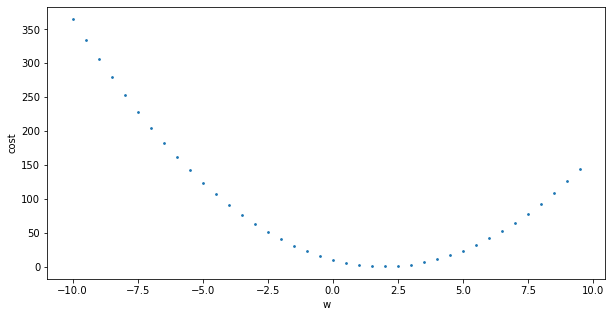

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MultivariateH:
    def __init__(self, w):
        # w는 다변량 파라미터 벡터입니다.
        self.w = np.array(w)
    
    def forward(self, X):
        # X는 다변량 입력 행렬입니다. 각 행은 하나의 샘플을 나타내며, 열은 다른 특성을 나타냅니다.
        return np.dot(X, self.w)
    
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error /= len(X)
    return error

# 예시 데이터 생성
np.random.seed(0)
X = np.random.rand(100, 3)  # 100개의 샘플과 각각 3개의 특성을 가진 다변량 입력 행렬
true_w = np.array([2, 3, 1])  # 다변량 파라미터 벡터
Y = np.dot(X, true_w) + np.random.randn(100) * 0.1  # 실제 값 행렬 (잡음을 포함한 예측값)

# 다변량 모델을 사용하는 예시
if __name__ == "__main__":
    list_w = []
    list_c = []
    for i in range(-20, 20):
        w = np.array([i * 0.5, i * 0.5, i * 0.5])  # 다변량 파라미터 벡터 생성
        multivariate_h = MultivariateH(w)
        c = cost(multivariate_h, X, Y)
        list_w.append(w[0])  # 첫 번째 원소만 추가 (단일 변수로 시각화하기 위함)
        list_c.append(c)
    
    print(list_w)  # w 값들이 잘 들어갔는지 확인해봅시다.
    print("★")
    print(list_c)  # c 값들이 잘 들어갔는지 확인해봅시다.
    
    plt.figure(figsize=(10,5))
    plt.xlabel('w')
    plt.ylabel('cost')
    plt.scatter(list_w, list_c, s=3)
    plt.show()


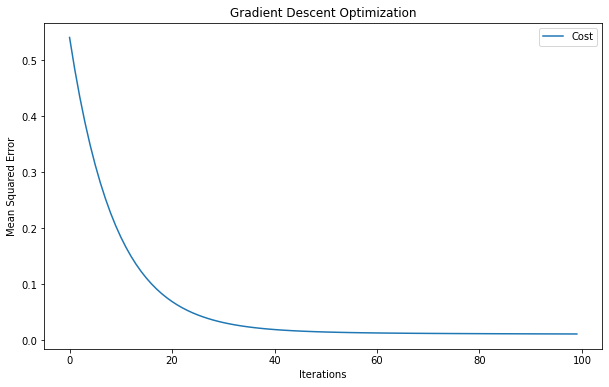

Final weights: [2.93177419 1.59396294]
Iteration 1: w = [2.16220093 1.06840144], cost = 0.5406280271879685
Iteration 2: w = [2.20011894 1.10227062], cost = 0.48432267852133537
Iteration 3: w = [2.23602684 1.13418763], cost = 0.43404811146357497
Iteration 4: w = [2.27003481 1.16426093], cost = 0.3891573402155904
Iteration 5: w = [2.30224695 1.192593  ], cost = 0.34907280658184203
Iteration 6: w = [2.33276163 1.21928065], cost = 0.31327892940936486
Iteration 7: w = [2.3616718  1.24441535], cost = 0.28131545358299204
Iteration 8: w = [2.38906529 1.26808352], cost = 0.2527715127723875
Iteration 9: w = [2.41502508 1.29036678], cost = 0.22728032933458767
Iteration 10: w = [2.43962958 1.31134228], cost = 0.20451448299569108
Iteration 11: w = [2.46295289 1.33108286], cost = 0.18418168727315254
Iteration 12: w = [2.48506501 1.34965738], cost = 0.16602101915048162
Iteration 13: w = [2.50603209 1.36713085], cost = 0.14979955336356165
Iteration 14: w = [2.52591665 1.38356473], cost = 0.13530935787

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self):
        self.w = None
    
    def initialize(self, dim):
        self.w = np.random.randn(dim)  # Initialize weights randomly

    def H(self, w, X):
        return np.dot(X, w)  # Linear hypothesis: h(X) = X * w

class GradientDescent:
    def __init__(self, lr=0.01, iterations=100):
        self.lr = lr
        self.iterations = iterations

    def optimize(self, model, cost, X, Y):
        history = {'w': [], 'cost': []}
        for _ in range(self.iterations):
            grad, mean_cost = self.calculate_gradient(model, cost, X, Y)
            model.w -= self.lr * grad
            history['w'].append(model.w.copy())
            history['cost'].append(mean_cost)
        return history

    def calculate_gradient(self, model, cost, X, Y):
        h = model.H(model.w, X)
        grad = np.dot(X.T, (h - Y)) / len(X)
        mean_cost = cost(h, X, Y)
        return grad, mean_cost

def cost_function(h, X, Y):
    return np.mean((h - Y) ** 2)

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
true_w = np.array([3, 1.5])
Y = np.dot(X, true_w) + np.random.randn(100) * 0.1  # Linear relationship with noise

# Initialize model and gradient descent optimizer
model = LinearModel()
model.initialize(X.shape[1])
optimizer = GradientDescent(lr=0.1, iterations=100)

# Run gradient descent
history = optimizer.optimize(model, cost_function, X, Y)
 

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(history['cost'], label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Optimization')
plt.legend()
plt.show()
print("Final weights:", model.w)

for i in range(len(history['w'])):
    print(f"Iteration {i+1}: w = {history['w'][i]}, cost = {history['cost'][i]}")

Iteration 10: w = [2.43962958 1.31134228], cost = 0.20451448299569108
Iteration 20: w = [2.62558072 1.46337183], cost = 0.07561080963754974
Iteration 30: w = [2.7364587  1.54401671], cost = 0.033663018311170426
Iteration 40: w = [2.80430785 1.58467261], cost = 0.01974525970789793
Iteration 50: w = [2.8473341 1.6030959], cost = 0.014907269114975131
Iteration 60: w = [2.87589518 1.60931471], cost = 0.013047404120037097
Iteration 70: w = [2.89589662 1.60897938], cost = 0.012194930532531758
Iteration 80: w = [2.91071714 1.60526158], cost = 0.011708235878742422
Iteration 90: w = [2.92230042 1.59993052], cost = 0.011374196353719956
Iteration 100: w = [2.93177419 1.59396294], cost = 0.011118529497036274


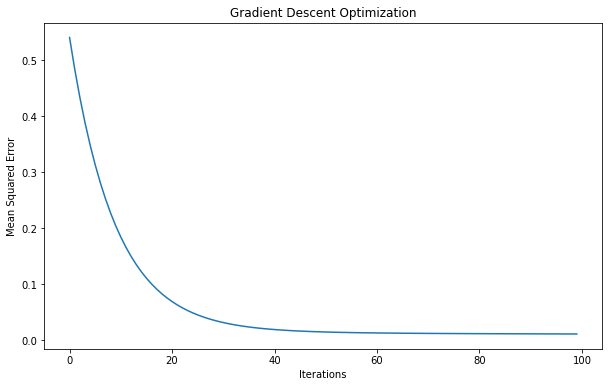

Final weights: [2.93177419 1.59396294], Final cost: 0.011118529497036274


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self):
        self.w = None
    
    def initialize(self, dim):
        self.w = np.random.randn(dim)  # Initialize weights randomly

    def H(self, X):
        return np.dot(X, self.w)  # Linear hypothesis: h(X) = X * w

class GradientDescent:
    def __init__(self, lr=0.01, iterations=100):
        self.lr = lr
        self.iterations = iterations

    def optimize(self, model, cost, X, Y):
        history = {'w': [], 'cost': []}
        for _ in range(self.iterations):
            grad, mean_cost = self.calculate_gradient(model, cost, X, Y)
            model.w -= self.lr * grad
            history['w'].append(model.w.copy())
            history['cost'].append(mean_cost)
            if (_ + 1) % 10 == 0:  # Print every 10 iterations
                print(f"Iteration {_ + 1}: w = {model.w}, cost = {mean_cost}")
        return history

    def calculate_gradient(self, model, cost, X, Y):
        h = model.H(X)
        grad = np.dot(X.T, (h - Y)) / len(X)
        mean_cost = cost(h, Y)
        return grad, mean_cost

def cost_function(h, Y):
    return np.mean((h - Y) ** 2)

# Generate some synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
true_w = np.array([3, 1.5])
Y = np.dot(X, true_w) + np.random.randn(100) * 0.1  # Linear relationship with noise

# Initialize model and gradient descent optimizer
model = LinearModel()
model.initialize(X.shape[1])

optimizer = GradientDescent(lr=0.1, iterations=100)

# Run gradient descent
history = optimizer.optimize(model, cost_function, X, Y)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(history['cost'])
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Optimization')
plt.show()

# Print final weights and cost
final_iteration = len(history['cost'])
print(f"Final weights: {history['w'][-1]}, Final cost: {history['cost'][-1]}")
